In [7]:
%run PartialOrder.ipynb

R = {(1, 1),(1, 2),(2, 1),(3, 3)}
S = {(1, 3),(2, 2),(3, 1)}
R∘S = {(1, 2),(1, 3),(2, 3),(3, 1)}
R complement = {(1, 3),(2, 2),(2, 3),(3, 1),(3, 2)}
R∘S converse = {(1, 3),(2, 1),(3, 1),(3, 2)}
(R) 1 is in relation with: FiniteSet(1, 2)
False
False
False
False
False
R = {(1, 1),(2, 2),(3, 3)}


In [13]:
from graphviz import Digraph
from IPython.display import IFrame, display

class PartialOrderGraphRepr(PartialOrder):
    
    def makeGraph(self, name="graph",filename='cluster.gv'):
        g = Digraph(name=name, node_attr={'shape': 'circle'})
        g.body.append(f'\t label=""')
        g.body.append('\t rankdir=BT;')   
        g.body.append('\t edge [arrowhead="none"];')
        
        dom = self.getDom() 
        
        dic = dict()
        for elem in dom:
            dic[elem] = self.inRelationWith(elem)

        for elem in dom:
            h = dic[elem]
            for s in dic.keys():
                if elem != s and s in dic[elem]:
                    h = self.difference(h,self.difference(dic[s], {s}))

            for p in h:
                if elem != p:
                    g.edge(str(elem),str(p))


        return g

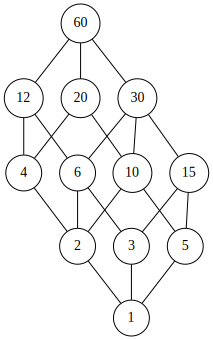

In [14]:
s = FiniteSet(1,2,3,4,5,6,10,12,15,20,30,60)
    
r = s ** 2

br = set()
for a,b in r:
    if b % a == 0:
        br.add((a,b))
        
p = PartialOrderGraphRepr(s, br)

p.makeGraph()